In [1]:
from app import main
from app import sliding_window

C:\Users\Bowen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
import datetime
min_lon = -89.11086962890625 - 1.6
max_lon = -88.69682275390625 + 1.6
min_lat = 40.53067026099156 - 0.7
max_lat = 41.05638178482896 + 0.7
start_date = datetime.date(2016,6,15)
timeperiod = 10
x,y = sliding_window(min_lon, max_lon, min_lat, max_lat, start_date, timeperiod)

NameError: name 'sliding_window' is not defined

In [ ]:
from sklearn.decomposition import PCA

In [2]:

from CDL_utils import *
cd = cdl_utils()
cd.min_lat


40.327146

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
import numpy as np

In [ ]:
pca.fit(X/np.max(X))

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
pca.get_covariance()

In [ ]:
pca.explained_variance_[0]

In [ ]:
pca.components_

In [ ]:
X2 = pca.transform(X)

In [6]:
from gome_work_flow import *
cd = cdl_utils()
gome = GNOME_utils(cd)
g = Gome_workflow()


In [3]:
from datetime import date, timedelta
date_ = date(2016, 5,1)
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
gome_path = convertGOMEDate(date_, prefix)

In [4]:
lon_belt = np.arange(-105, -80, 0.5)
lat_belt = np.arange(35, 50, 0.5)

lon_belt

array([-105. , -104.5, -104. , -103.5, -103. , -102.5, -102. , -101.5,
       -101. , -100.5, -100. ,  -99.5,  -99. ,  -98.5,  -98. ,  -97.5,
        -97. ,  -96.5,  -96. ,  -95.5,  -95. ,  -94.5,  -94. ,  -93.5,
        -93. ,  -92.5,  -92. ,  -91.5,  -91. ,  -90.5,  -90. ,  -89.5,
        -89. ,  -88.5,  -88. ,  -87.5,  -87. ,  -86.5,  -86. ,  -85.5,
        -85. ,  -84.5,  -84. ,  -83.5,  -83. ,  -82.5,  -82. ,  -81.5,
        -81. ,  -80.5])

In [5]:
from mpl_toolkits.basemap import Basemap, cm
# from numpy import meshgrid

[[110 110 110 ..., 110 110 110]
 [110 110 110 ..., 110 110 110]
 [110 110 110 ..., 110 110 110]
 ..., 
 [  3   4   5 ...,  50  51  52]
 [  2   3   4 ...,  49  50  51]
 [  1   2   3 ...,  48  49  50]]


C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


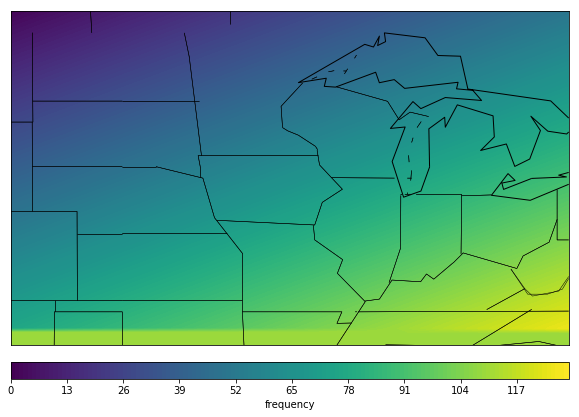

In [7]:
plt.figure(figsize=(10,10))
map = Basemap(llcrnrlon=-105,llcrnrlat=35,urcrnrlon=-80.,urcrnrlat=50.)
map.drawcoastlines()
map.drawstates()

# print(map.llcrnrx)
xx, yy = map.makegrid(50,80)

data = np.array([np.arange(50) - i + 80 for i in range(80)])
data[0:4, :] = 110
print(data)
clevs = np.arange(130)
map.contourf(xx,yy,data,clevs)
cbar = map.colorbar(location='bottom',pad="5%")
cbar.set_label('frequency')
plt.show()

In [13]:
from math import floor
import matplotlib.pyplot as plt
%matplotlib inline


def annualplot(min_lon, max_lon, min_lat, max_lat, gome):
    
    """
    given min_lon, max_lon, min_lat, max_lat, gome
    return time_series_lat, time_series_lon, time_series_sif
    """
    
    gome.min_lon, gome.max_lon, gome.min_lat, gome.max_lat = min_lon, max_lon, min_lat, max_lat
    prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'    
    date_ = date(2016,1,1)
    
    time_series_lon = []
    time_series_lat = []
    time_series_sif = []
    time_series_lon_cl = []
    time_series_lat_cl = []
    time_series_sif_cl = []
    time_ = []
    for i in range(365):
        try:
            gome_path = convertGOMEDate(date_, prefix)
            gome.load_gnome(gome_path, date_)
            date_ += timedelta(1)
            time_series_lat.append(gome.lats)
            time_series_lon.append(gome.lons)
            time_series_sif.append(gome.GOME_sif)
            gome.get_clean_gmone_data()
            time_series_lat_cl.append(gome.lats)
            time_series_lon_cl.append(gome.lons)
            time_series_sif_cl.append(gome.GOME_sif)
            time_.append(i+1)
            print(i+1)
        except Exception as e:
            date_ += timedelta(1)
            print(e)
        
    return time_, time_series_lat, time_series_lon, time_series_sif, time_series_lon_cl, time_series_lat_cl, time_series_sif_cl
        


def baseplot(lat_belt, lon_belt, window_size, prefix, gome):
    
    """
    date_ is the starting date
    days are the number of days in the sliding window workflow
    lat belt is the latitude array
    lon belt is the longitude array
    window size is the size of the sliding window
    prefix for the prefix of gome path
    gome is a gome_utils object 
    plot the footprint coverage of GOME or (OCO2)
    """
    
    #initialize
    gome.min_lon, gome.max_lon, gome.min_lat, gome.max_lat = -105, -80, 35, 50
    prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
    date_ = date(2016, 7,1)
    map = Basemap(llcrnrlon= min(lon_belt),llcrnrlat= min(lat_belt), urcrnrlon= max(lon_belt),urcrnrlat= max(lat_belt))
    days = (date(2016, 7, 16) - date_).days

#     clevs = np.arange(240)/4
    xx, yy = map.makegrid(len(lon_belt),len(lat_belt))
    
    #workflow
    for l in range(days//10):
        print('new 10 days window')
        footprint_mat = np.zeros((len(lat_belt), len(lon_belt)))
        for k in range(window_size):
            try:
                new_date = date_ + timedelta(l*10 + k)
                print('newdate', new_date)
                gome_path = convertGOMEDate(new_date, prefix)
                gome.load_gnome(gome_path, new_date)
                print(gome.get_clean_gmone_data())
                for lon,lat in zip(gome.lons, gome.lats):

                    lon_integer, lat_integer, lon_round, lat_round = floor(lon), floor(lat), round(lon), round(lat)

                    lon_index = int((lon_integer - min(lon_belt))*2 + lon_round - lon_integer)
                    lat_index = int((lat_integer - min(lat_belt))*2 + lat_round - lat_integer)

                    if lat_index < 0 or lat_index >= footprint_mat.shape[0] or lon_index < 0 or lon_index >= footprint_mat.shape[1]:
                        continue
                    footprint_mat[lat_index, lon_index] += 1
            except Exception as e:
                print(e)
                continue

        plt.figure(figsize=(10,10))
        map.drawcoastlines()
        map.drawstates()
        map.contourf(xx, yy, footprint_mat, cmap = cm.GMT_no_green)
        map.drawparallels(np.arange(20, 50, 2), labels=[0,1,1,0])
        map.drawmeridians(np.arange(-105, -80, 2), labels=[1,0,0,1])
        cbar = map.colorbar(location='bottom',pad="15%")
        cbar.set_label('frequency')
        plt.title(str(date_ + timedelta(l*10)) + ' to '+ str(date_ + timedelta(l*10+ window_size - 1)) + ' GOME with filter')
        plt.savefig("plots\\presentation\\" + str(date_ + timedelta(l*10)) + ' to '+ str(date_ + timedelta(l*10+ window_size -1)) + 'with_filter.png')

new 10 days window
newdate 2016-07-01
True
newdate 2016-07-02
True
newdate 2016-07-03
True
newdate 2016-07-04
True
newdate 2016-07-05
True
newdate 2016-07-06
True
newdate 2016-07-07
True
newdate 2016-07-08
True
newdate 2016-07-09
True
newdate 2016-07-10
True
newdate 2016-07-11
True
newdate 2016-07-12
True
newdate 2016-07-13
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\07\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160713_v27_all.nc'
newdate 2016-07-14
True
newdate 2016-07-15
True
newdate 2016-07-16
True
newdate 2016-07-17
True
newdate 2016-07-18
True
newdate 2016-07-19
True
newdate 2016-07-20
True
newdate 2016-07-21
True
newdate 2016-07-22
True
newdate 2016-07-23
True
newdate 2016-07-24
True
newdate 2016-07-25
True
newdate 2016-07-26
True
newdate 2016-07-27
True
newdate 2016-07-28
True
newdate 2016-07-29
True
newdate 2016-07-30
True


C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


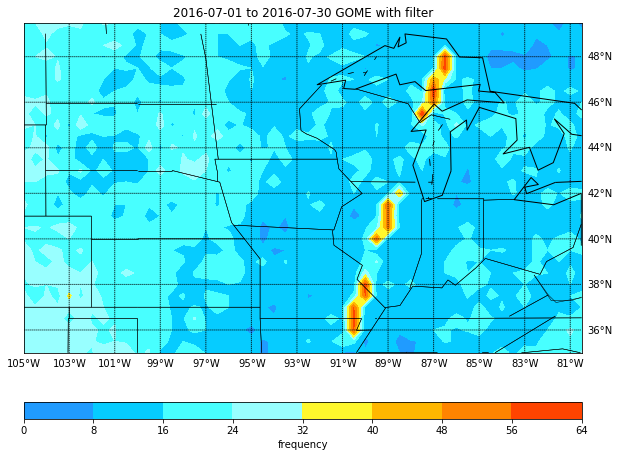

In [48]:
gome.min_lon, gome.max_lon, gome.min_lat, gome.max_lat = -105, -80, 35, 50
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
lon_belt = np.arange(-105, -80, 0.5)
lat_belt = np.arange(35, 50, 0.5)
baseplot(lat_belt, lon_belt, 30, prefix, gome)
convertGOMEDate

In [71]:
gm = GNOME_utils(cd)
time_, ts_lat, ts_lon, ts_sif, ts_lat_cl, ts_lon_cl, ts_sif_cl = annualplot(-88.5, -88.0, 40, 40.5, gm)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\01\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160121_v27_all.nc'
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\02\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160208_v27_all.nc'
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\02\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160209_v27_all.nc'
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\02\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160210_v27_all.nc'
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\02\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160211_v27_all.nc'
43
44
45
46
47
48
49
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\02\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160219_v27_all.nc'
51
52
53
54
55
56
57
58
59
60
61
62
63
64
[Errno 2] No such f

In [72]:
un_cleaned_sif = []
cleaned_sif = []

for i,j in zip(time_, ts_sif):
    if j != []:
        for k in j:
            un_cleaned_sif.append([i,k])
        
for i,j in zip(time_, ts_sif_cl):
    if j != []:
        for k in j:
            cleaned_sif.append([i, k])

        

C:\Users\Bowen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  """
C:\Users\Bowen\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


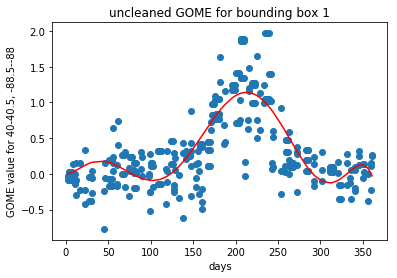

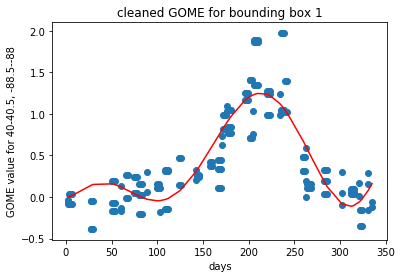

In [73]:
import statsmodels.api as sm


def poly(x, power):
    return np.array([x**i for i in range(power)]).T


model_uncleaned = sm.OLS(np.array(un_cleaned_sif)[:,1], poly(np.array(un_cleaned_sif)[:,0], 8)).fit()
plt.scatter(np.array(un_cleaned_sif)[:,0], np.array(un_cleaned_sif)[:,1])
plt.plot(np.array(un_cleaned_sif)[:,0], model_uncleaned.predict(), color = 'red')
plt.xlabel('days')
plt.ylabel('GOME value for 40-40.5, -88.5--88')
plt.title('uncleaned GOME for bounding box 1')
plt.savefig('plots\\presentation\\uncleaned GOME for bounding box 1.png')
plt.figure()

model_cleaned = sm.OLS(np.array(cleaned_sif)[:,1], poly(np.array(cleaned_sif)[:,0], 8)).fit()
plt.scatter(np.array(cleaned_sif)[:,0], np.array(cleaned_sif)[:,1])
plt.xlabel('days')
plt.ylabel('GOME value for 40-40.5, -88.5--88')
plt.title('cleaned GOME for bounding box 1')
plt.plot(np.array(cleaned_sif)[:,0], model_cleaned.predict(), color = 'red')
plt.savefig('plots\\presentation\\cleaned GOME for bounding box 1.png')

In [50]:
cd.min_lon, cd.max_lon, cd.min_lat, cd.max_lat

(-91.421028, -87.39817, 40.327146, 42.523501)

In [2]:
import re
from dbfread import DBF
data = DBF('configuration/cdl.dbf')

In [3]:
#filter empty cells
dataset = []
for i in data:
    if i['CLASS_NAME'] != '':
        dataset.append(i)
    

In [5]:
pattern = re.compile(r'\bWater\b|Undefined|Developed|Clouds|Background|Aquaculture')
non_empty = set()
non_veg = set()
forest = set()
corns = set()
soybeans = set()


for i, obj in enumerate(dataset):
    print(obj['CLASS_NAME'], obj['VALUE'])
#     if obj['CLASS_NAME'] != '':
#         non_empty.add(obj['VALUE'])
    
#     if re.findall(p, obj['CLASS_NAME']) != []:
#         print('non_vegetation', obj['CLASS_NAME'], obj['VALUE'])
#         non_veg.add(obj['VALUE'])
        
#     if re.findall(r'forest|Forest', obj['CLASS_NAME']) != []:
#         print('forest', obj['CLASS_NAME'], obj['VALUE'])
#         forest.add(obj['VALUE'])
        
#     if re.findall(r'corn|Corn', obj['CLASS_NAME']) != []:
#         print('corn', obj['CLASS_NAME'], obj['VALUE'])
#         corns.add(obj['VALUE'])
        
        
#     if re.findall(r'soybean|Soybean', obj['CLASS_NAME']) != []:
#         print('soybean', obj['CLASS_NAME'], obj['VALUE'])
#         soybeans.add(obj['VALUE'])
        
    


Background 0
Corn 1
Cotton 2
Rice 3
Sorghum 4
Soybeans 5
Sunflower 6
Peanuts 10
Tobacco 11
Sweet Corn 12
Pop or Orn Corn 13
Mint 14
Barley 21
Durum Wheat 22
Spring Wheat 23
Winter Wheat 24
Other Small Grains 25
Dbl Crop WinWht/Soybeans 26
Rye 27
Oats 28
Millet 29
Speltz 30
Canola 31
Flaxseed 32
Safflower 33
Rape Seed 34
Mustard 35
Alfalfa 36
Other Hay/Non Alfalfa 37
Camelina 38
Buckwheat 39
Sugarbeets 41
Dry Beans 42
Potatoes 43
Other Crops 44
Sugarcane 45
Sweet Potatoes 46
Misc Vegs & Fruits 47
Watermelons 48
Onions 49
Cucumbers 50
Chick Peas 51
Lentils 52
Peas 53
Tomatoes 54
Caneberries 55
Hops 56
Herbs 57
Clover/Wildflowers 58
Sod/Grass Seed 59
Switchgrass 60
Fallow/Idle Cropland 61
Forest 63
Shrubland 64
Barren 65
Cherries 66
Peaches 67
Apples 68
Grapes 69
Christmas Trees 70
Other Tree Crops 71
Citrus 72
Pecans 74
Almonds 75
Walnuts 76
Pears 77
Clouds/No Data 81
Developed 82
Water 83
Wetlands 87
Nonag/Undefined 88
Aquaculture 92
Open Water 111
Perennial Ice/Snow 112
Developed/Open 

In [20]:
non_veg

{0, 81, 82, 83, 88, 92, 111, 121, 122, 123, 124}

In [14]:
import numpy as np
a = set(np.arange(255))

In [32]:
STR = "AFDSAFDA\nadfsafds"

In [33]:
STR

'AFDSAFDA\nadfsafds'

In [25]:
veg = non_empty - non_veg
grass = veg - forest

{63, 141, 142, 143}

In [17]:
g_flow = Gome_workflow()
g_flow.preprocess_cdl()
g_flow.preprocess_par()
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
min_lon = -89.11086962890625-1.6
max_lon = -88.69682275390625+1.6
min_lat = 41.53067026099156 - 0.7
max_lat = 42.05638178482896 + 0.7
n_date = date_
n_date = datetime.date(2016, 6, 15)
for i in range(30):
    n_date += timedelta(1)
    g_flow.process_gome(n_date, prefix, min_lon, max_lon, min_lat, max_lat)
    if g_flow.gome.lat_corners != []:
        print(n_date)

preprocessing cdl
preprocessing par
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160616_v27_all.nc
lons []
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160617_v27_all.nc
lons []
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160618_v27_all.nc
lons []
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160619_v27_all.nc
lons [-88.83974457]
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160620_v27_all.nc
lons [-88.73891449 -88.83990479]
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160621_v27_all.nc
lons []
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160622_v27_all.nc
lons []
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160623_v27_all.nc
lons [-88.87243652 -88.95736694 -89.02518463]
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160624_v27_all.nc
lons [-88.69863129 -88.82563782]
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160625_v27_all.nc
lons [-88.88768768]
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160626_v27_all.nc
lons []
gome_

C:\Users\Bowen\Desktop\work\Satellite_Big_Data_Scripts\Par_util.py:16: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data[var] = ds[var][:]
C:\Users\Bowen\Desktop\work\Satellite_Big_Data_Scripts\Par_util.py:16: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data[var] = ds[var][:]


lons []
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160628_v27_all.nc
lons [-89.01687622]
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160629_v27_all.nc
lons []
gome_path 06\ret_f_nr5_nsvd12_v26_waves734_nolog.20160630_v27_all.nc
lons [-88.92734528 -89.01634216]
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160701_v27_all.nc
lons []
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160702_v27_all.nc
lons []
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160703_v27_all.nc
lons [-88.8352356]
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160704_v27_all.nc
lons [-88.90641785 -89.01990509]
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160705_v27_all.nc
lons []
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160706_v27_all.nc
lons []
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160707_v27_all.nc
lons []
gome_path 07\ret_f_nr5_nsvd12_v26_waves734_nolog.20160708_v27_all.nc
lons [-88.90062714 -88.87258148 -89.04003143]
gome_path 07\ret_f_nr5_nsvd12_v26_

FileNotFoundError: [Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\07\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160713_v27_all.nc'

In [13]:
g_flow.gome.lat_corners

[]

In [1]:
import numpy as np

In [32]:
A = np.random.uniform(15,20, 100)

In [33]:
B = np.random.uniform(1,10, 100)

In [34]:
m = []
sd = []
for i in range(10000):
    s = np.array([1,-1])
    switch = np.random.choice(s, size = 100)
    new_data = (A - B)*switch
    m.append(np.mean(new_data))
    sd.append(np.std(new_data))
    

In [35]:
np.mean(m)

-0.017652412925656578

In [36]:
np.mean(A-B)

12.21556482019086

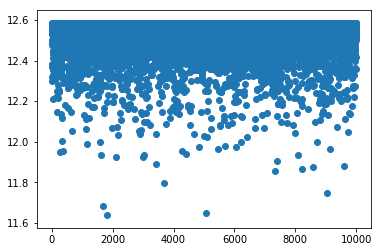

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(np.arange(10000), sd)

In [38]:
a = np.array([1/3, 2/3, 2/3])
b = np.array([2,])

[0.8866377531430506,
 1.5596365986303622,
 0.40859320964520474,
 -1.1658607966872048,
 1.0086453271575031,
 0.086314054236400053,
 2.3290817378877691,
 -0.27742312402763936,
 -2.2427600467350035,
 1.4572933754860364,
 -1.1759724535523601,
 -0.40615684532455243,
 -0.90043478812343514,
 -0.64264766848717425,
 -1.6525373636022411,
 0.57492321285658565,
 -0.94542190785221836,
 -2.6765000750930046,
 -0.60990882529025259,
 -0.38714546250618354,
 -0.95255926203839281,
 -2.5811033688357066,
 -0.36230020041581334,
 -0.043674654877255942,
 0.42285017380892886,
 -0.79184911967472782,
 1.5467472573406846,
 -0.037434464319960073,
 1.1548169146500975,
 -2.0763795399856515,
 -0.13189985874172439,
 0.58654437445542362,
 1.0351491416097429,
 0.93696650937414327,
 -0.11104111599355003,
 0.5147353425601936,
 1.4482317415964971,
 1.8476741833625752,
 -0.96974654013214934,
 -0.43478326982291571,
 1.8466801279276817,
 0.13328209002425576,
 0.86572775774206079,
 -1.3547974134351393,
 3.0446086995500616,
 -1.